In [14]:
#lets import pandas
import pandas as pd

#copy path and paste
data = pd.read_csv('/content/breast-cancer.csv')

data.head()

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,3-5,True,2,left,right_up,False,recurrence-events


In [40]:
#find how many entries and features we have in the dataset
num_entries = data.shape[0]
num_features = data.shape[1]

# I'm listing all the feature names and their corresponding data types
features = data.columns.tolist()
data_types = data.dtypes

# Now, I'm checking out some basic stat
statistics = data.describe()

# I'm gathering all the metadata in one place for easy access
metadata = {
    "Number of Entries": num_entries,
    "Number of Features": num_features,
    "Features": features,
    "Data Types": data_types,
    "Basic Statistics": statistics
}

metadata

{'Number of Entries': 272,
 'Number of Features': 11,
 'Features': ['age',
  'mefalsepause',
  'tumor-size',
  'inv-falsedes',
  'falsede-caps',
  'deg-malig',
  'breast',
  'breast-quad',
  'irradiat',
  'class',
  'age_range'],
 'Data Types': age              int64
 mefalsepause     int64
 tumor-size       int64
 inv-falsedes     int64
 falsede-caps     int64
 deg-malig        int64
 breast           int64
 breast-quad      int64
 irradiat          bool
 class            int64
 age_range       object
 dtype: object,
 'Basic Statistics':               age  mefalsepause  tumor-size  inv-falsedes  falsede-caps  \
 count  272.000000    272.000000  272.000000    272.000000    272.000000   
 mean     3.658088      1.077206    4.110294      1.110294      0.261029   
 std      1.011378      0.985838    2.161975      1.955870      0.502638   
 min      1.000000      0.000000    0.000000      0.000000      0.000000   
 25%      3.000000      0.000000    3.000000      0.000000      0.000000   


In [22]:
#Value ranges (mean, percentile, ...)


statistics = data.describe()

statistics

,deg-malig
count,272.000000
mean,2.058824
std,0.736649
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [24]:
# Display the columns in the dataset
columns = data.columns
print("Dataset Columns:", columns)

Dataset Columns: Index(['age', 'mefalsepause', 'tumor-size', 'inv-falsedes', 'falsede-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat', 'class'],
      dtype='object')


In [30]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['mefalsepause', 'tumor-size', 'inv-falsedes', 'falsede-caps', 'breast',
       'breast-quad', 'class'],
      dtype='object')


In [41]:
# importing the tool we need to turn text into numbers
from sklearn.preprocessing import LabelEncoder

# I'm creating a LabelEncoder to change text data into numbers
label_encoder = LabelEncoder()

# I need to change all the non-number columns into numbers
# So I'm going through each column that has text
for column in non_numeric_columns:
    # Here, I transform the text data into numbers
    data[column] = label_encoder.fit_transform(data[column])

# Finally, I'll print out the data types to make sure everything is now numbers
print("Here's how the data types look after encoding:", data.dtypes)

Here's how the data types look after encoding: age              int64
mefalsepause     int64
tumor-size       int64
inv-falsedes     int64
falsede-caps     int64
deg-malig        int64
breast           int64
breast-quad      int64
irradiat          bool
class            int64
age_range       object
dtype: object


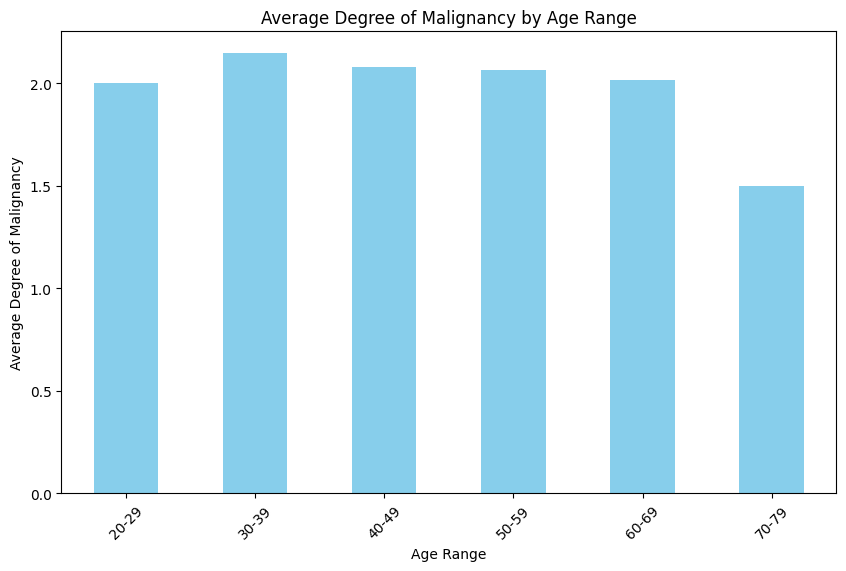

In [42]:
import matplotlib.pyplot as plt

# Calculate mean degree of malignancy by age range
mean_deg_malig_by_age = data.groupby('age_range')['deg-malig'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
mean_deg_malig_by_age.plot(kind='bar', color='skyblue')
plt.title('Average Degree of Malignancy by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Degree of Malignancy')
plt.xticks(rotation=45)
plt.show()

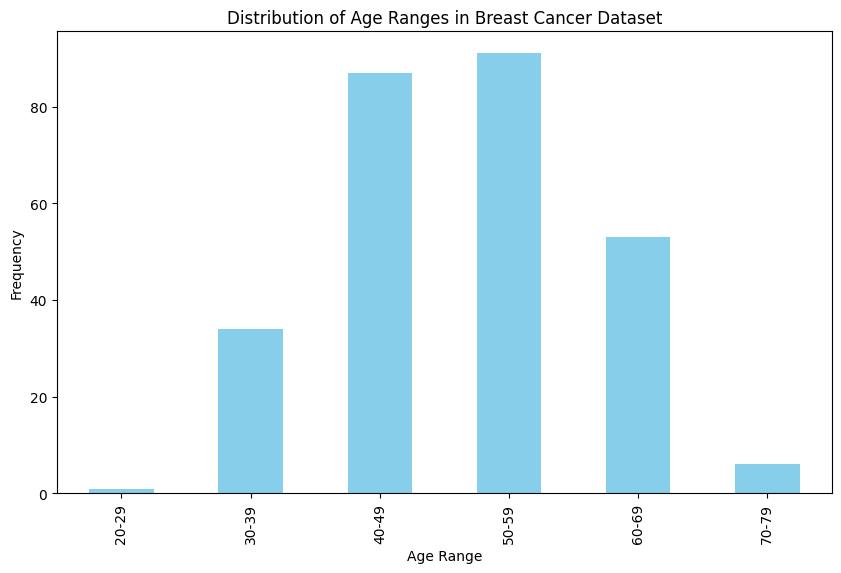

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Here, I'm creating a map to convert numbers back into age ranges
age_mapping = {
    1: '20-29',
    2: '30-39',
    3: '40-49',
    4: '50-59',
    5: '60-69',
    6: '70-79',
    7: '80-89',
    8: '90-99'
}

# I'm using this map to change the numbers in the 'age' column back to age ranges
data['age_range'] = data['age'].map(age_mapping)

# Let's make a bar chart to see how many people are in each age range
plt.figure(figsize=(10, 6))  # Setting the size of the plot
data['age_range'].value_counts().sort_index().plot(kind='bar', color='skyblue')  # Creating a bar chart with sorted age ranges

plt.title('Distribution of Age Ranges in Breast Cancer Dataset')

#x
plt.xlabel('Age Range')
#y
plt.ylabel('Frequency')

plt.show()

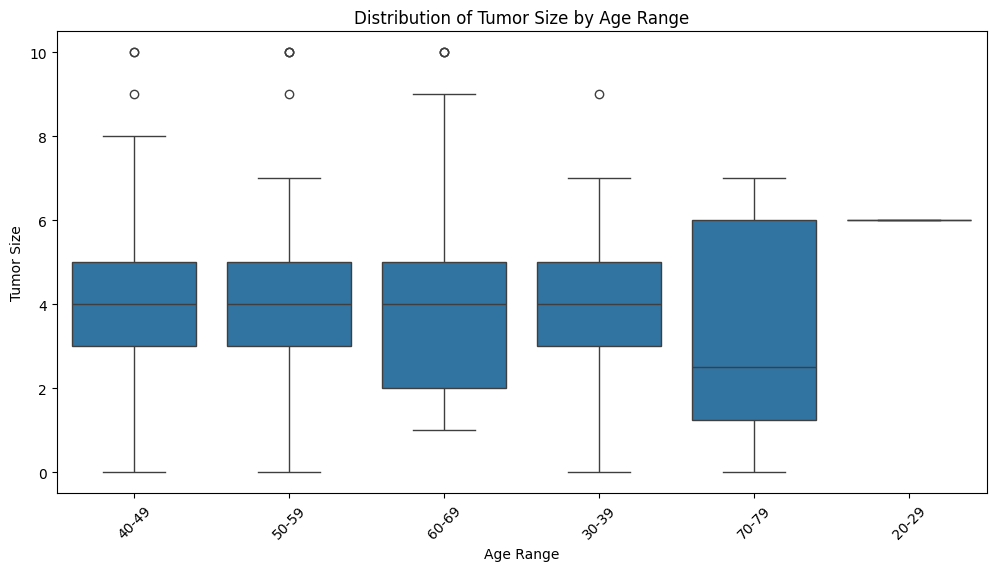

In [39]:
import matplotlib.pyplot as plt

# Box plot of tumor size by age range
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_range', y='tumor-size', data=data)
plt.title('Distribution of Tumor Size by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Tumor Size')
plt.xticks(rotation=45)
plt.show()